<a href="https://colab.research.google.com/github/amandalemette/EQM2108/blob/lorenasatler-patch-1/C%C3%B3digo_Trocador_de_Calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
#Importando as bibliotecas necessárias
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [242]:
N = 3 #divisões do trocador
L = 3 #tamanho do trocador em metros

#Dados fornecidos
T_ref= 293.15 #K
ri= 0.1 #m
roi= 0.12 #m
roe = 0.15 #m
dz = L/N #m
k = 450000 #W/mˆ2k

# Dados do fluido do lado do casco (sheet) (água fria)
Cps = 4185 #J/kgK
T0s = 250 #K
As = 0.02543 #m pi*(0,15-0,12)**2
rho_s = 1000 #kg/mˆ3
Fs = 0.1 #mˆ3/s
A_sups= 2*np.pi*roi*dz

# Dados do fluido do lado do tudo (solução)
Cpt = 1200 #J/kgK
T0t = 330 #K
At = 0.0314 #m pi*0.1**2
rho_t = 1030 #kg/mˆ3
Ft = 0.2 #mˆ3/s
A_supt= 2*np.pi*ri*dz

In [243]:
t_final = 0.0008 #tempo de simulação
dt = 0.00000001

In [244]:
Tt_out = np.zeros(N)*T0t
Ts_out = np.zeros(N)*T0s

In [245]:
t = np.arange(0,t_final,dt)

In [246]:
t

array([0.0000e+00, 1.0000e-08, 2.0000e-08, ..., 7.9997e-04, 7.9998e-04,
       7.9999e-04])

In [247]:
x0 = [T0t,T0t,T0t,T0s,T0s,T0s]

In [248]:
def EDO (y,t):

  Tt_out = y[0:3]
  Ts_out = y[3:]

  dydt = np.zeros(len(y))

  # lado do tubo
  dydt[0] = (rho_t*Cpt*Ft*(T0t - Tt_out[0]) - k*A_supt*(Tt_out[0]-Ts_out[2])/dz)/rho_t*At*dz*Cpt
  dydt[1] = (rho_t*Cpt*Ft*(Tt_out[0] - Tt_out[1]) - k*A_supt*(Tt_out[1]-Ts_out[1])/dz)/rho_t*At*dz*Cpt
  dydt[2] = (rho_t*Cpt*Ft*(Tt_out[1] - Tt_out[2]) - k*A_supt*(Tt_out[2]-Ts_out[0])/dz)/rho_t*At*dz*Cpt

  # lado do casco
  dydt[3] = (rho_s*Cps*Fs*(T0s - Ts_out[0]) - k*A_sups*(Ts_out[0]-Tt_out[2])/dz)/rho_s*As*dz*Cps
  dydt[4] = (rho_s*Cps*Fs*(Ts_out[0] - Ts_out[1]) - k*A_sups*(Ts_out[1]-Tt_out[1])/dz)/rho_s*As*dz*Cps
  dydt[5] = (rho_s*Cps*Fs*(Ts_out[1] - Ts_out[2]) - k*A_sups*(Ts_out[1]-Tt_out[0])/dz)/rho_s*As*dz*Cps


  return dydt

In [249]:
x = odeint(EDO, x0, t)
x

array([[330.        , 330.        , 330.        , 250.        ,
        250.        , 250.        ],
       [329.99172752, 329.99172715, 329.99172715, 250.02887406,
        250.02888049, 250.02888049],
       [329.98345964, 329.98345814, 329.98345814, 250.05772186,
        250.05774756, 250.05774757],
       ...,
       [320.9804206 , 298.70882633, 279.88253203, 263.38209193,
        279.2028706 , 313.07833752],
       [320.9804189 , 298.7088228 , 279.88252781, 263.38208987,
        279.20286764, 313.0783353 ],
       [320.98041721, 298.70881928, 279.88252359, 263.38208781,
        279.20286468, 313.07833307]])

In [250]:
x.shape

(80000, 6)

In [251]:
Tt_out = x[:,:3]
Tt_out

array([[330.        , 330.        , 330.        ],
       [329.99172752, 329.99172715, 329.99172715],
       [329.98345964, 329.98345814, 329.98345814],
       ...,
       [320.9804206 , 298.70882633, 279.88253203],
       [320.9804189 , 298.7088228 , 279.88252781],
       [320.98041721, 298.70881928, 279.88252359]])

In [252]:
Ts_out = x[:,3:]
Ts_out

array([[250.        , 250.        , 250.        ],
       [250.02887406, 250.02888049, 250.02888049],
       [250.05772186, 250.05774756, 250.05774757],
       ...,
       [263.38209193, 279.2028706 , 313.07833752],
       [263.38208987, 279.20286764, 313.0783353 ],
       [263.38208781, 279.20286468, 313.07833307]])

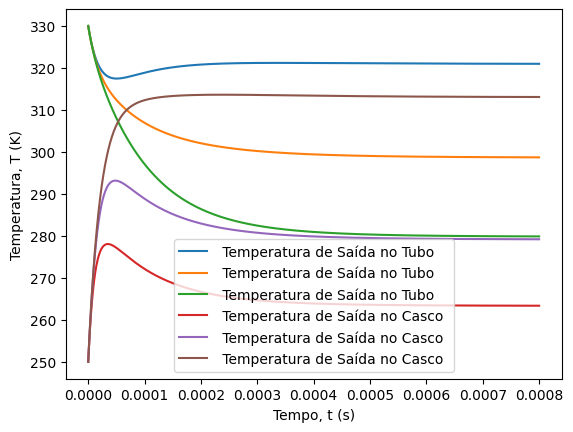

In [253]:
plt.plot(t,Tt_out,label = ' Temperatura de Saída no Tubo ')
plt.plot(t,Ts_out,label = ' Temperatura de Saída no Casco ')
plt.xlabel ("Tempo, t (s)")
plt.ylabel ("Temperatura, T (K)")


plt.legend()
plt.show()

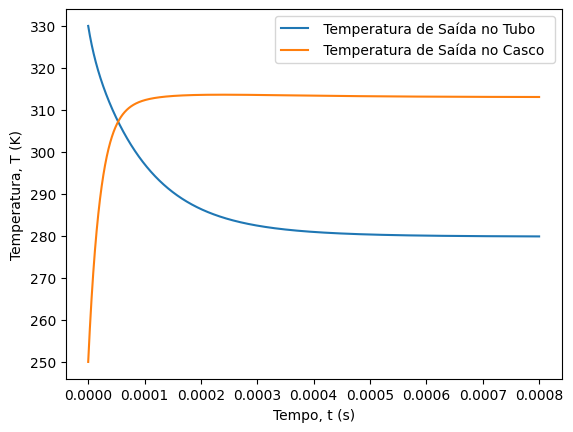

In [254]:
plt.plot(t,Tt_out[:,2],label = ' Temperatura de Saída no Tubo ')
plt.plot(t,Ts_out[:,2],label = ' Temperatura de Saída no Casco ')
plt.xlabel ("Tempo, t (s)")
plt.ylabel ("Temperatura, T (K)")


plt.legend()
plt.show()

#Referências

1. Libre Texts Engineering - Acessado em 01 de junho de 2023: https://eng.libretexts.org/Bookshelves/Industrial_and_Systems_Engineering/Chemical_Process_Dynamics_and_Controls_(Woolf)/06%3A_Modeling_Case_Studies/6.06%3A_ODE_and_Excel_model_of_a_Heat_Exchanger


2. Aula 23 - Trocadores de Calor - Professor Washington Izarrabal (UFJF) - Acessado em 24 de junho de 2023: https://www.ufjf.br/washington_irrazabal/files/2014/05/Aula-23_Trocadores-de-Calor.pdf